In [1]:
from sklearn import datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.tree import export_text

In [7]:
from sklearn.model_selection import ShuffleSplit, cross_validate

In [8]:
iris = datasets.load_iris()

In [9]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)

In [11]:
df['target'] = pd.Series(
    iris.target
)

In [12]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
df['target_values'] = df['target'].apply(
    lambda y:iris.target_names[y]
)

In [14]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_values
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [15]:
number_of_columns_and_rows = df.shape
number_of_columns_and_rows

(150, 6)

In [16]:
df.sample(n=6,random_state = 42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_values
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa


In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size = 0.3)

In [18]:
sample_training_set = df_train.head(5)
sample_training_set

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_values
94,5.6,2.7,4.2,1.3,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
13,4.3,3.0,1.1,0.1,0,setosa
110,6.5,3.2,5.1,2.0,2,virginica
139,6.9,3.1,5.4,2.1,2,virginica


In [19]:
sample_testing_set = df_test.head(5)
sample_testing_set

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_values
67,5.8,2.7,4.1,1.0,1,versicolor
104,6.5,3.0,5.8,2.2,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
113,5.7,2.5,5.0,2.0,2,virginica
3,4.6,3.1,1.5,0.2,0,setosa


In [20]:
x_train,y_train = df_train[iris.feature_names],df_train['target']
x_test,y_test = df_test[iris.feature_names], df_test['target']

In [21]:
# it is common to call a classifier intense as clf
clf = DecisionTreeClassifier()

In [22]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
# if y_test is the truth then y_test_pred is our estimate of the truth from the model.

y_test_pred = clf.predict(x_test)

In [24]:
accuracy_score(y_test,y_test_pred)

0.9555555555555556

In [25]:
pd.DataFrame(
    {
        'feature_names': iris.feature_names,
        'feature_importance': clf.feature_importances_
    }
).sort_values(
    'feature_importance',ascending = False

).set_index('feature_names')

,feature_importance
feature_names,
petal width (cm),0.915214
petal length (cm),0.063334
sepal width (cm),0.021452
sepal length (cm),0.000000


In [26]:
print(
    export_text(clf, feature_names = iris.feature_names, spacing = 3, decimals = 1)
)

|--- petal width (cm) <= 0.7
|   |--- class: 0
|--- petal width (cm) >  0.7
|   |--- petal width (cm) <= 1.7
|   |   |--- petal length (cm) <= 5.0
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.0
|   |   |   |--- petal width (cm) <= 1.6
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.6
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.7
|   |   |--- petal length (cm) <= 4.9
|   |   |   |--- sepal width (cm) <= 3.1
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.1
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.9
|   |   |   |--- class: 2



####

In [27]:
accuracy_scores = []

In [28]:
for _ in range(100):
    df_train, df_test = train_test_split(df, test_size = 0.3)
    x_train, y_train  = df_train[iris.feature_names], df_train['target']
    x_test, y_test    = df_test[iris.feature_names], df_test['target']
    clf               = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy_scores.append(round(accuracy_score(y_test,y_pred),3))
accuracy_scores = pd.Series(accuracy_scores)

<AxesSubplot:title={'center':'Distribution of classifier accuracy'}>

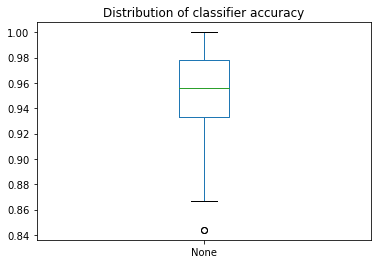

In [29]:
accuracy_scores.plot(
    title = 'Distribution of classifier accuracy',
    kind  = 'box',
)

In [30]:
print(
    """Average Score: {:.3} [5th percentile: {:.3} & 95th percentile
    :{:.3}]""".format(
    accuracy_scores.mean(),
    accuracy_scores.quantile(.05),
    accuracy_scores.quantile(.05),
    )
)

Average Score: 0.946 [5th percentile: 0.889 & 95th percentile
    :0.889]


####

In [31]:
accuracy_scores = []
rs = ShuffleSplit(n_splits = 100,  test_size=0.3)
for train_index, test_index in rs.split(df):
    x_train, x_test = df.loc[train_index, iris.feature_names], df.loc[test_index, iris.feature_names]
    y_train, y_test = df.loc[train_index, 'target'], df.loc[test_index, 'target']
    clf = DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))
accuracy_scores = pd.Series(accuracy_scores)

In [32]:
for max_depth in [1,2,3,4]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    rs  = ShuffleSplit(n_splits=20, test_size=0.25)
    cv_results = cross_validate(
        clf, x_train, y_train, cv=rs, scoring='accuracy'
    )
    accuracy_scores = pd.Series(cv_results['test_score'])
    print('@ max_depth = {}: accuracy_scores: {}~{}'.format(
        max_depth,
        accuracy_scores.quantile(0.1).round(3),
        accuracy_scores.quantile(0.9).round(3),
    ))

@ max_depth = 1: accuracy_scores: 0.481~0.633
@ max_depth = 2: accuracy_scores: 0.889~1.0
@ max_depth = 3: accuracy_scores: 0.815~1.0
@ max_depth = 4: accuracy_scores: 0.844~1.0


In [33]:
def plot_decision_boundaries(clf, x, y):
    feature_names = x.columns
    x, y          = x.values, y.values
    x_min, x_max  = x[:,0].min(), x[:,0].max()
    y_min, y_max  = x[:,1].min(), x[:,1].max()    
    step          = 0.02
    xx, yy        = np.meshgrid(
        np.arange(x_min, y_max, step),
        np.arange(y_min, y_max, step)
    )
    z             = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z             = z.reshape(xx.shape)
    plt.figure(figsize=(12,8))
    plt.contourf(xx,yy,z,cmap='Paired_r',alpha=0.25)
    plt.contour(xx,yy,z,colors='k',linewidths = 0.7)
    plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k')
    plt.title("Tree's Decision Boundaries")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

In [34]:
x = df[['petal width (cm)', 'petal length (cm)']]

In [35]:
y = df['target']

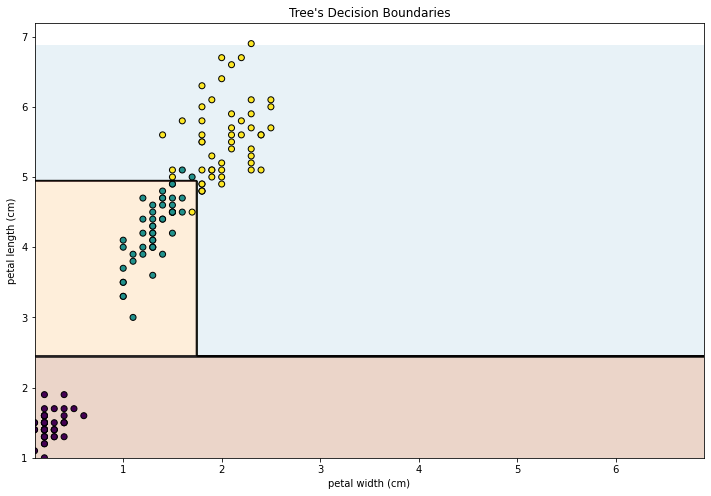

In [36]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x,y)
plot_decision_boundaries(clf,x,y)